In [2]:
在处理缺失值之前，我们首先读取数据集文件，并提取出对应的数值属性

In [54]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [55]:
data = pd.read_csv("../../dataset/wine-reviews/winemag-data_first150k.csv",usecols=['country','description','designation','points','price','province','region_1','region_2','variety','winery'])
num = data.iloc[:,3:5]
num1 = data.iloc[:,3:4]
num2 = data.iloc[:,4:5]
print(num)

        points  price
0           96  235.0
1           96  110.0
2           96   90.0
3           96   65.0
4           95   66.0
5           95   73.0
6           95   65.0
7           95  110.0
8           95   65.0
9           95   60.0
10          95   80.0
11          95   48.0
12          95   48.0
13          95   90.0
14          95  185.0
15          95   90.0
16          95  325.0
17          95   80.0
18          95  290.0
19          95   75.0
20          95   24.0
21          95   79.0
22          95  220.0
23          95   60.0
24          95   45.0
25          94   57.0
26          94   62.0
27          94  105.0
28          94   60.0
29          94   60.0
...        ...    ...
150900      81   13.0
150901      81   12.0
150902      81   10.0
150903      81    7.0
150904      81   10.0
150905      80   13.0
150906      93   65.0
150907      92   52.0
150908      90   65.0
150909      89   52.0
150910      89   38.0
150911      87   37.0
150912      87   65.0
150913    

我们可以发现原数据中的prices和points属性存在一定数量的空值（大约13725条）

#### 1. 删除空值处理

In [48]:
#删除数值属性中有空值的行
data1 = data.dropna(subset=['points','price'])
print(data1)

            country                                        description  \
0                US  This tremendous 100% varietal wine hails from ...   
1             Spain  Ripe aromas of fig, blackberry and cassis are ...   
2                US  Mac Watson honors the memory of a wine once ma...   
3                US  This spent 20 months in 30% new French oak, an...   
4            France  This is the top wine from La Bégude, named aft...   
5             Spain  Deep, dense and pure from the opening bell, th...   
6             Spain  Slightly gritty black-fruit aromas include a s...   
7             Spain  Lush cedary black-fruit aromas are luxe and of...   
8                US  This re-named vineyard was formerly bottled as...   
9                US  The producer sources from two blocks of the vi...   
10            Italy  Elegance, complexity and structure come togeth...   
11               US  From 18-year-old vines, this supple well-balan...   
12               US  A standout even i

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206D70D1128>]],
      dtype=object)

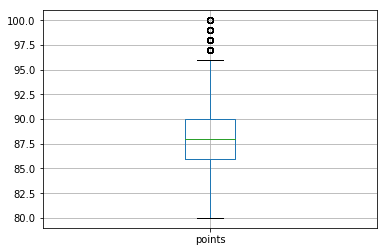

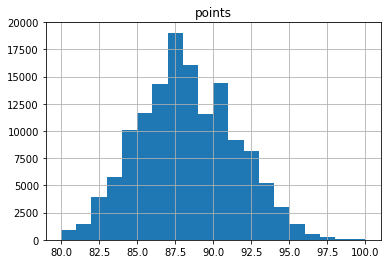

In [20]:
#删除空值后的可视化结果
cancel_num1 = data1.iloc[:,3:4]
cancel_num1.boxplot()
cancel_num1.hist(bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206D4FA5F60>]],
      dtype=object)

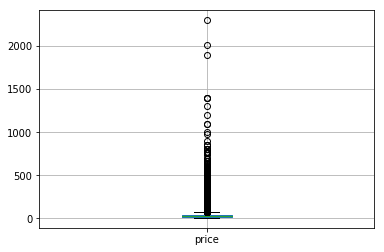

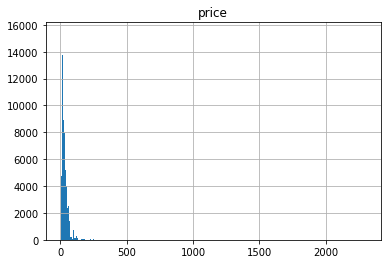

In [21]:
cancel_num2 = data1.iloc[:,4:5]
cancel_num2.boxplot()
cancel_num2.hist(bins = 800)

#### 2. 用最高频率值进行填充

In [28]:
count = num.loc[:,'points'].value_counts()
print(count)

87     20747
88     17871
90     15973
86     15573
89     12921
85     12411
84     10708
91     10536
92      9241
83      6048
93      6017
82      4041
94      3462
95      1716
81      1502
80       898
96       695
97       365
98       131
99        50
100       24
Name: points, dtype: int64


In [36]:
data2 = data
data2['points'] = data2['points'].fillna(87)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206D4C24908>]],
      dtype=object)

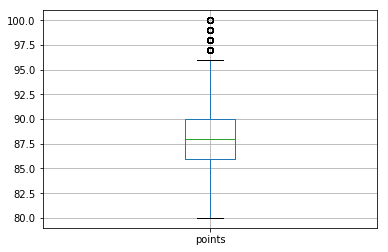

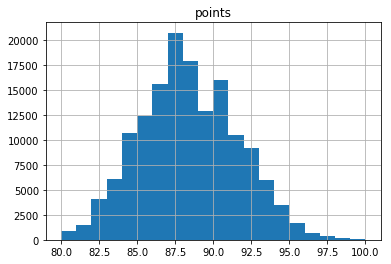

In [35]:
fre_num1 = data2.iloc[:,3:4]
fre_num1.boxplot()
fre_num1.hist(bins = 20)

fre_num2 = data2.iloc[:,4:5]
fre_num2.boxplot()
fre_num2.hist(bins = 800)

#### 3. 根据数据对象的相似性来填充数据值

   这里我们使用的是KNN算法，实体之间的距离计算使用曼哈顿距离。K的值设置为6。我们选取与存在空缺值的向量距离最近的6个向量在对应属性上的平均值来对空缺值进行填充。

In [60]:
data3 = copy.deepcopy(data)
data3['designation'] = pd.factorize(data3['designation'])[0].astype(np.uint16)
data3['country'] = pd.factorize(data3['country'])[0].astype(np.uint16)

print(data3)


        country                                        description  \
0             0  This tremendous 100% varietal wine hails from ...   
1             1  Ripe aromas of fig, blackberry and cassis are ...   
2             0  Mac Watson honors the memory of a wine once ma...   
3             0  This spent 20 months in 30% new French oak, an...   
4             2  This is the top wine from La Bégude, named aft...   
5             1  Deep, dense and pure from the opening bell, th...   
6             1  Slightly gritty black-fruit aromas include a s...   
7             1  Lush cedary black-fruit aromas are luxe and of...   
8             0  This re-named vineyard was formerly bottled as...   
9             0  The producer sources from two blocks of the vi...   
10            3  Elegance, complexity and structure come togeth...   
11            0  From 18-year-old vines, this supple well-balan...   
12            0  A standout even in this terrific lineup of 201...   
13            2  Thi